# Phase 1: Dataset Setup

In [725]:
import pandas as pd

In [726]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [727]:
# Shape of dataset
print("Shape:", df.shape)

Shape: (7043, 21)


In [728]:
# Column names
print("Columns:", df.columns.tolist())

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [729]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [730]:
# Check for any null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Phase 2: Data Dictionary Creation

| Column                                                                                                | Description                             | Type                     | Notes                                 |
| ----------------------------------------------------------------------------------------------------- | --------------------------------------- | ------------------------ | ------------------------------------- |
| `customerID`                                                                                          | Unique ID for each customer             | Object                   | Drop during modeling                  |
| `gender`                                                                                              | Gender of customer                      | Object                   | Categorical                           |
| `SeniorCitizen`                                                                                       | 1 if senior citizen, 0 otherwise        | Int                      | Can keep as-is                        |
| `Partner`                                                                                             | Has a partner (Yes/No)                  | Object                   | Binary categorical                    |
| `Dependents`                                                                                          | Has dependents (Yes/No)                 | Object                   | Binary                                |
| `tenure`                                                                                              | Number of months customer has stayed    | Int                      | Numerical, useful                     |
| `PhoneService`                                                                                        | Has phone service                       | Object                   | Yes/No                                |
| `MultipleLines`                                                                                       | Has multiple phone lines                | Object                   | Yes/No/No phone service               |
| `InternetService`                                                                                     | Type of internet (DSL, Fiber, None)     | Object                   | Multi-category                        |
| `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` | Yes/No/No internet service              | Object                   | Convert "No internet service" to "No" |
| `Contract`                                                                                            | Type of contract (Month-to-month, etc.) | Object                   | Strong predictor                      |
| `PaperlessBilling`                                                                                    | Uses paperless billing                  | Object                   | Binary                                |
| `PaymentMethod`                                                                                       | Payment type (Credit card, Bank, etc.)  | Object                   | Multi-category                        |
| `MonthlyCharges`                                                                                      | Monthly bill                            | Float                    | Continuous                            |
| `TotalCharges`                                                                                        | Total paid till now                     | Object → Should be float | Needs cleaning                        |
| `Churn`                                                                                               | Whether customer left                   | Object                   | Target variable                       |


In [733]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [734]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [735]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [736]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [737]:
df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [738]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [739]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [740]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [741]:
df['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [742]:
df['TotalCharges'].dtype

dtype('O')

# Phase 3: EDA + Statistics

In [744]:
import seaborn as sns
import matplotlib.pyplot as plt

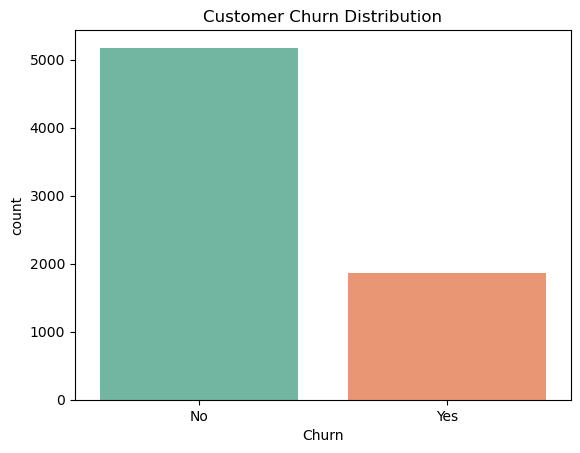

In [745]:
# Count of Churn values
sns.countplot(data=df, x='Churn', hue = 'Churn', palette='Set2', legend = False)
plt.title("Customer Churn Distribution")
plt.show()

* Majority of customers stayed (~73%)
* About 27% churned

In [747]:
churn_rate  = df['Churn'].value_counts(normalize = True)* 100
print("Churn Rate (%):\n", churn_rate)

Churn Rate (%):
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


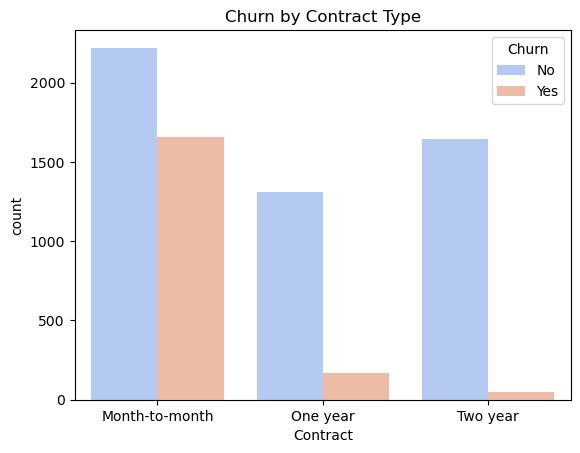

In [748]:
# Churn by Contract Type
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')
plt.title("Churn by Contract Type")
plt.show()

* Month-to-month customers have the highest churn rate.
* Longer contracts (1-year & 2-year) have very low churn.
* Customers with shorter commitments are more likely to leave.

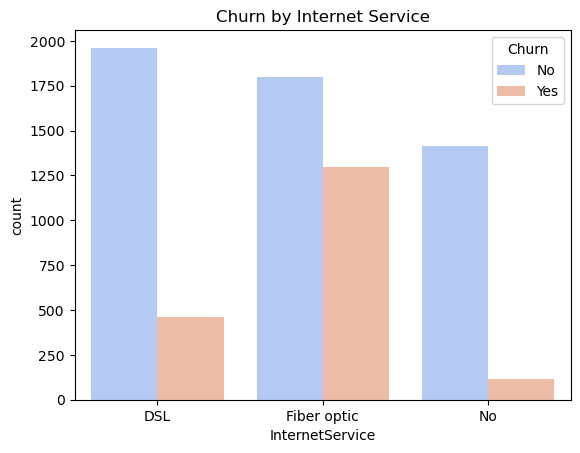

In [750]:
# Churn by Internet Service
sns.countplot(data=df, x='InternetService', hue='Churn', palette='coolwarm')
plt.title("Churn by Internet Service")
plt.show()

* Customers using fiber optic have a significantly higher churn rate.
* DSL users also churn but at a noticeably lower rate.
* Those with no internet service rarely churn — likely because they only use basic services.

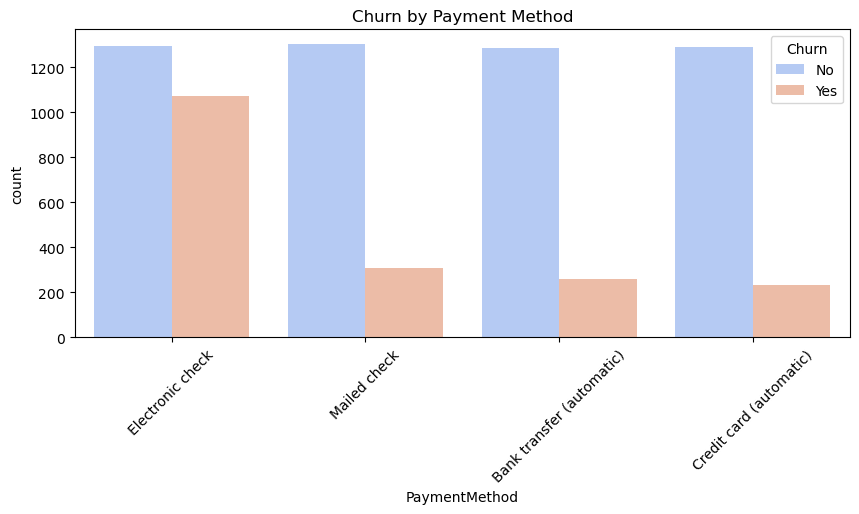

In [752]:
# Churn by Payment Method
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.show()

* Electronic check customers have the highest churn rate.
* Customers using automatic payments (bank transfer or credit card) churn the least.

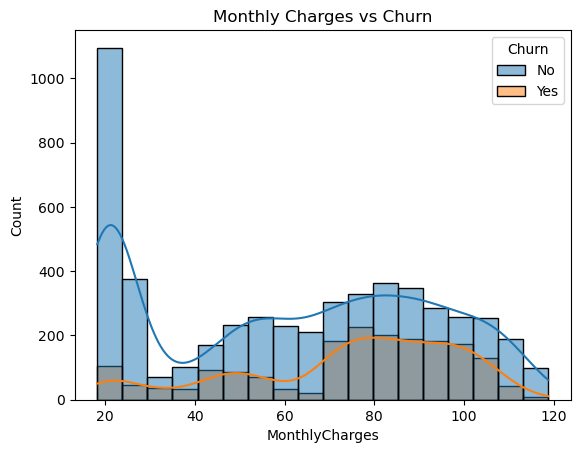

In [754]:
# Distribution of Monthly Charges
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True)
plt.title("Monthly Charges vs Churn")
plt.show()

* Customers with lower charges (<$30) rarely churn.
  
* Churn increases with higher monthly charges (peaks around $70–100).

  
* The density line is much higher in the $60–100 range.

C:\Users\Admin\AppData\Local\Temp\ipykernel_1400\1873233744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette='Set3')


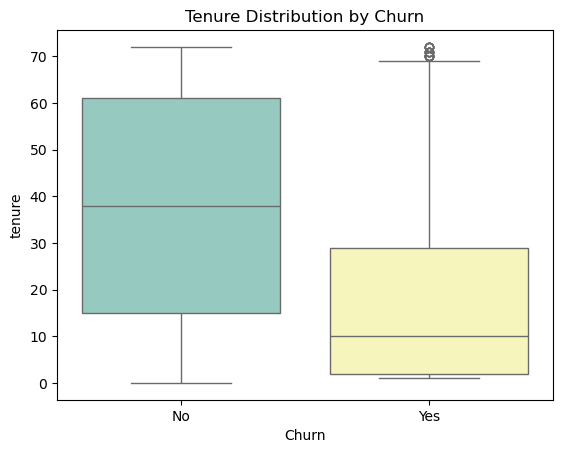

In [756]:
# Boxplot of Tenure vs Churn
sns.boxplot(data=df, x='Churn', y='tenure', palette='Set3')
plt.title("Tenure Distribution by Churn")
plt.show()

* Churn = No: Median tenure is much higher (around ~40 months).
* Churn = Yes: Median tenure is low (around ~10 months).
* For Churn = No, the IQR is broader, suggesting that tenure among non-churned customers is more spread out.
* For Churn = Yes, the IQR is narrow, indicating most churners left early.
* Some churned customers stayed a long time (visible outliers above 60 months), but they are exceptions.
* Most churners left earlier than those who stayed.

#### Chi-Square Test: Is churn associated with contract type?

In [759]:
from scipy.stats import chi2_contingency

# contingency table
ct = pd.crosstab(df['Contract'], df['Churn'])

chi2, p, dof, expected = chi2_contingency(ct)
print("Chi-Square Test p-value:", p)

if p < 0.05:
    print("Significant association between Contract type and Churn.")
else:
    print("No significant association.")


Chi-Square Test p-value: 5.863038300673391e-258
Significant association between Contract type and Churn.


#### T-Test: Do monthly charges differ between churned and retained customers?

##### As we're comparing the means of two independent groups.

In [762]:
from scipy.stats import ttest_ind

churned = df[df['Churn'] == 'Yes']['MonthlyCharges']
not_churned = df[df['Churn'] == 'No']['MonthlyCharges']

t_stat, p_val = ttest_ind(churned, not_churned)
print("T-test p-value:", p_val)

if p_val < 0.05:
    print("Monthly charges significantly differ between groups.")
else:
    print("No significant difference.")


T-test p-value: 2.7066456068884154e-60
Monthly charges significantly differ between groups.


# Phase 4: Preprocessing & Feature Engineering

In [764]:
# Save original data before scaling for power bi

df_for_powerbi = df.copy()
df_for_powerbi.to_csv("churn_cleaned_data.csv", index=False)

In [765]:
# Drop Unnecessary Columns
df = df.drop('customerID', axis = 1)

* customerID has no predictive value.

In [767]:
# Convert TotalCharges to Numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [768]:
df['TotalCharges'].isna().sum()

11

In [769]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [770]:
df = df[df['TotalCharges'].notnull()]

In [771]:
# Encode Categorical Variables


* Binary -> use map()
* Multi-category -> use pd.get_dummies()


In [773]:
# Binary encoding
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [774]:
df = pd.get_dummies(df)

In [775]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,False,False,True,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,False,False,True,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,1,29.60,346.45,0,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,74.40,306.60,1,...,True,False,False,True,False,False,False,False,False,True


In [776]:
# Scale Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [777]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Split features & target
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Phase 5: Model Building

In [779]:
# Logistic Regression

In [780]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize & train
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8045486851457001
Precision: 0.649546827794562
Recall: 0.5748663101604278
F1 Score: 0.6099290780141844
Confusion Matrix:
 [[917 116]
 [159 215]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

